In [0]:
import os
import os.path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr   
from scipy.ndimage.filters import gaussian_filter
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd

Mount google drive where folder of images has been added

In [0]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
## Sanity check to make sure drive is connected 
os.listdir('/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH11 machine learning/') 

['PCD25', 'PCD30', 'PCD47', 'WT_Elias', 'WT_Jasmine', 'WT_Michael']

Functions we'll use

In [0]:
def process_image(im):
	''' im is Image object, returned by call to open (Pillow) '''
	im_arr = np.asarray(im, dtype='float32')
	thresh = im_arr[:,:,0] > np.percentile(im_arr[:,:,0], 20)
	corr, _ = pearsonr(im_arr[thresh, 0], im_arr[thresh, 1])
	return corr

def get_corr_im_dir(DIR):	
  im_list = os.listdir(DIR)
  corr_list = []
  names = []
  for im in im_list:
    if im.lower()[-4:] == ".tif":
      im_ob = Image.open(os.path.join(DIR, im))
      corr = process_image(im_ob)
      corr_list.append(corr)
      names.append(DIR + im)

  return np.asarray(corr_list), np.asarray(names)

Sample locations

In [0]:

## DNAH5

DNAH5_wt1 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH5 machine learning/WT_cropped/'
DNAH5_wt2 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH5 machine learning/WT_Zhen_crop/' 
DNAH5_wt3 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH5 machine learning/WT FOR PCD17 CROPPED CELLS/' ## TRAIN CONTROL 
DNAH5_wt4 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH5 machine learning/WT_Elias_crop/'
#DNAH5_wt4 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH5 machine learning/WT FOR PCD23 CROPPED CELLS/' ## problem with contrast
DNAH5_wt5 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH5 machine learning/WTjasmine/'

DNAH5_pcd35 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH5 machine learning/PCD35_cropped/' ## TRAIN CASE
DNAH5_pcd36 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH5 machine learning/PCD36_cropped/' ## TRAIN CONTROL
DNAH5_pcd38 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH5 machine learning/PCD38_cropped/'
DNAH5_pcd17 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH5 machine learning/PCD17_cropped/'
DNAH5_pcd40 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH5 machine learning/PCD40_crop/'
DNAH5_pcd42 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH5 machine learning/PCD42/'
DNAH5_pcd43 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH5 machine learning/PCD43/'
DNAH5_pcd20 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH5 machine learning/PCD20/'

## CCDC39

CCDC39_pt1 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/CCDC39 machine learning/CCDC39_PCD33_cells cropped/'
CCDC39_wt1 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/CCDC39 machine learning/CCDC39_WTcells_cropped/'

## DNAH11

DNAH11_pt1 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH11 machine learning/PCD47/'
DNAH11_pt2 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH11 machine learning/PCD30/'
DNAH11_pt3 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH11 machine learning/PCD25/'

DNAH11_wt1 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH11 machine learning/WT_Michael/'
DNAH11_wt2 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH11 machine learning/WT_Jasmine/'
DNAH11_wt3 = '/content/drive/My Drive/Machine Learning_Max Intensity Projections/DNAH11 machine learning/WT_Elias/'


Read in and save the sample data as numpy arrays

In [0]:
## DNAH5

# DNAH5_wt1_cor, _ = get_corr_im_dir(DNAH5_wt1)
# DNAH5_wt2_cor, _ = get_corr_im_dir(DNAH5_wt2)
# DNAH5_wt3_cor, _ = get_corr_im_dir(DNAH5_wt3)
# DNAH5_wt4_cor, _ = get_corr_im_dir(DNAH5_wt4)
# DNAH5_wt5_cor, _ = get_corr_im_dir(DNAH5_wt5)

# DNAH5_pcd35_cor, _ = get_corr_im_dir(DNAH5_pcd35)
# DNAH5_pcd36_cor, _ = get_corr_im_dir(DNAH5_pcd36)
# DNAH5_pcd38_cor, _ = get_corr_im_dir(DNAH5_pcd38)
# DNAH5_pcd17_cor, _ = get_corr_im_dir(DNAH5_pcd17)
# DNAH5_pcd40_cor, _ = get_corr_im_dir(DNAH5_pcd40)
# DNAH5_pcd42_cor, _ = get_corr_im_dir(DNAH5_pcd42)
# DNAH5_pcd43_cor, _ = get_corr_im_dir(DNAH5_pcd43)
# DNAH5_pcd20_cor, _ = get_corr_im_dir(DNAH5_pcd20)

# ## CCDC39

# CCDC39_pt1_cor, _ = get_corr_im_dir(CCDC39_pt1)
# CCDC39_wt1_cor, _ = get_corr_im_dir(CCDC39_wt1)

## DNAH11

DNAH11_pt1_cor, _ = get_corr_im_dir(DNAH11_pt1)
DNAH11_wt1_cor, _ = get_corr_im_dir(DNAH11_wt1)
DNAH11_pt2_cor, _ = get_corr_im_dir(DNAH11_pt2)
DNAH11_wt2_cor, _ = get_corr_im_dir(DNAH11_wt2)
#DNAH11_pt3_cor, _ = get_corr_im_dir(DNAH11_pt3)
DNAH11_wt3_cor, _ = get_corr_im_dir(DNAH11_wt3)

## DNAH5 ANALYSIS

Create DNAH5-only dataframe to build and test classifier 

In [0]:
## np array of per-cell cilia correlations
comb_cor = np.concatenate((DNAH5_wt1_cor,
                           DNAH5_wt2_cor,
                           DNAH5_wt3_cor,
                           DNAH5_wt4_cor,
                           DNAH5_wt5_cor,
                           DNAH5_pcd35_cor,
                           DNAH5_pcd36_cor,
                           DNAH5_pcd38_cor,
                           DNAH5_pcd17_cor,
                           DNAH5_pcd40_cor,
                           DNAH5_pcd42_cor,
                           DNAH5_pcd43_cor,
                           DNAH5_pcd20_cor),axis = 0)

## np array of all sample names
cor_names = np.concatenate((np.repeat("DNAH5_wt1",len(DNAH5_wt1_cor)),
                      np.repeat("DNAH5_wt2",len(DNAH5_wt2_cor)),
                      np.repeat("DNAH5_wt3",len(DNAH5_wt3_cor)),
                      np.repeat("DNAH5_wt4",len(DNAH5_wt4_cor)),
                      np.repeat("DNAH5_wt5",len(DNAH5_wt5_cor)),
                      np.repeat("DNAH5_pcd35",len(DNAH5_pcd35_cor)),
                      np.repeat("DNAH5_pcd36",len(DNAH5_pcd36_cor)),
                      np.repeat("DNAH5_pcd38",len(DNAH5_pcd38_cor)),
                      np.repeat("DNAH5_pcd17",len(DNAH5_pcd17_cor)),
                      np.repeat("DNAH5_pcd40",len(DNAH5_pcd40_cor)),
                      np.repeat("DNAH5_pcd42",len(DNAH5_pcd42_cor)),
                      np.repeat("DNAH5_pcd43",len(DNAH5_pcd43_cor)),
                      np.repeat("DNAH5_pcd20",len(DNAH5_pcd20_cor))),axis = 0)

## np array of {0,1} labels 
case_status = np.concatenate((np.repeat(0,len(DNAH5_wt1_cor)),
                      np.repeat(0,len(DNAH5_wt2_cor)),
                      np.repeat(0,len(DNAH5_wt3_cor)),
                      np.repeat(0,len(DNAH5_wt4_cor)),
                      np.repeat(0,len(DNAH5_wt5_cor)),
                      np.repeat(1,len(DNAH5_pcd35_cor)),
                      np.repeat(1,len(DNAH5_pcd36_cor)),
                      np.repeat(1,len(DNAH5_pcd38_cor)),
                      np.repeat(1,len(DNAH5_pcd17_cor)),
                      np.repeat(1,len(DNAH5_pcd40_cor)),
                      np.repeat(1,len(DNAH5_pcd42_cor)),
                      np.repeat(1,len(DNAH5_pcd43_cor)),
                      np.repeat(1,len(DNAH5_pcd20_cor))),axis = 0)

## creating df
dnah5_df = pd.DataFrame.from_dict({'Correlation' : comb_cor, 'Sample' : cor_names, 'Label' : case_status})
                                  

In [0]:
dnah5_df.head()


,Correlation,Sample,Label
0,0.516252,DNAH5_wt1,0
1,0.467006,DNAH5_wt1,0
2,0.152175,DNAH5_wt1,0
3,0.708480,DNAH5_wt1,0
4,0.463679,DNAH5_wt1,0


Train classifier for each held out sample of DNAH5 patients and controls


In [0]:
## Extract training samples, Cases: , Controls: 
training_samples = ["DNAH5_wt1","DNAH5_wt3","DNAH5_pcd35","DNAH5_pcd36"]
train_df = dnah5_df.set_index("Sample")
train_df = train_df.loc[training_samples] ## extract training samples 

## Extract test samples (everyone else)
test_df = dnah5_df.set_index("Sample")
test_df = test_df.drop(training_samples,axis=0) ## drop training samples 


x = np.array(train_df.Correlation.tolist())
y = np.array(train_df.Label.tolist())

clf = SVC(kernel='rbf',gamma = 'auto', random_state=1234).fit(x.reshape(-1,1),y)

## predict in held out sample 
x_ho = np.array(test_df.Correlation.tolist()).reshape(-1,1)
y_ho = np.array(test_df.Label.tolist())

ho_pred = clf.predict(x_ho)

pred_array = ho_pred
label_array = y_ho
sample_array = np.array(test_df.index)


In [0]:
sample_names = test_df.index.unique()

dnah5_pred_df = pd.DataFrame.from_dict({'Prediction' : pred_array, 'Sample' : sample_array, 'Label' : label_array})
dnah5_pred_df = dnah5_pred_df.set_index("Sample")

for name in sample_names: 
  pred_mean = dnah5_pred_df.loc[name].Prediction.mean()
  pred_mean_sd = dnah5_pred_df.loc[name].Prediction.std()
  pred_samp_size = dnah5_pred_df.loc[name].Prediction.size
  pred_se_mean = pred_mean_sd/np.sqrt(pred_samp_size)
  pred_lcl = pred_mean - 1.96*pred_se_mean
  pred_ucl = pred_mean + 1.96*pred_se_mean
  print(name,"Mean: ",pred_mean,", LCL: ",pred_lcl,", UCL: ",pred_ucl)



DNAH5_wt2 Mean:  0.09090909090909091 , LCL:  0.03693937434917507 , UCL:  0.14487880746900675
DNAH5_wt4 Mean:  0.010101010101010102 , LCL:  -0.009696969696969716 , UCL:  0.029898989898989918
DNAH5_wt5 Mean:  0.0 , LCL:  0.0 , UCL:  0.0
DNAH5_pcd38 Mean:  0.7103448275862069 , LCL:  0.6362564506696218 , UCL:  0.784433204502792
DNAH5_pcd17 Mean:  0.9926470588235294 , LCL:  0.9782352941176471 , UCL:  1.0070588235294118
DNAH5_pcd40 Mean:  0.6666666666666666 , LCL:  0.5747299208219085 , UCL:  0.7586034125114247
DNAH5_pcd42 Mean:  1.0 , LCL:  1.0 , UCL:  1.0
DNAH5_pcd43 Mean:  1.0 , LCL:  1.0 , UCL:  1.0
DNAH5_pcd20 Mean:  0.8554216867469879 , LCL:  0.7793030765498128 , UCL:  0.9315402969441631


## DNAH11 ANALYSIS

Create DNAH11-only dataframe to build and test classifier 

In [0]:
## np array of per-cell cilia correlations
comb_cor = np.concatenate((DNAH11_wt1_cor,
                           DNAH11_wt2_cor,
                           DNAH11_wt3_cor,
                           DNAH11_pt1_cor,
                           DNAH11_pt2_cor),axis = 0)

## np array of all sample names
cor_names = np.concatenate((np.repeat("DNAH11_wt1",len(DNAH11_wt1_cor)),
                      np.repeat("DNAH11_wt2",len(DNAH11_wt2_cor)),
                      np.repeat("DNAH11_wt3",len(DNAH11_wt3_cor)),
                      np.repeat("DNAH11_pt1",len(DNAH11_pt1_cor)),
                      np.repeat("DNAH11_pt2",len(DNAH11_pt2_cor))),axis = 0)

## np array of {0,1} labels 
case_status = np.concatenate((np.repeat(0,len(DNAH11_wt1_cor)),
                      np.repeat(0,len(DNAH11_wt2_cor)),
                      np.repeat(0,len(DNAH11_wt3_cor)),
                      np.repeat(1,len(DNAH11_pt1_cor)),
                      np.repeat(1,len(DNAH11_pt2_cor))),axis = 0)

## creating df
dnah11_df = pd.DataFrame.from_dict({'Correlation' : comb_cor, 'Sample' : cor_names, 'Label' : case_status})
                                  

[Text(0, 0, 'DNAH11_wt1'),
 Text(0, 0, 'DNAH11_wt2'),
 Text(0, 0, 'DNAH11_wt3'),
 Text(0, 0, 'DNAH11_pt1'),
 Text(0, 0, 'DNAH11_pt2')]

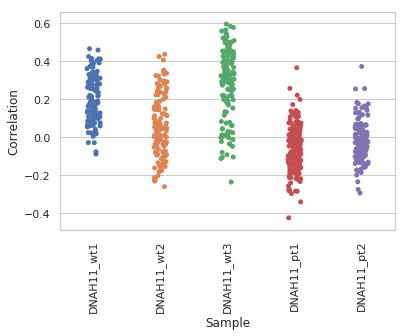

In [0]:
sns.set(style="whitegrid")
ax = sns.stripplot(x="Sample", y="Correlation", data=dnah11_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Classifier for DNAH11 samples 

In [0]:
## Extract training samples, Cases: , Controls: 
training_samples = ["DNAH11_wt1","DNAH11_wt3","DNAH11_pt1"]
train_df = dnah11_df.set_index("Sample")
train_df = train_df.loc[training_samples] ## extract training samples 

## Extract test samples (everyone else)
test_df = dnah11_df.set_index("Sample")
test_df = test_df.drop(training_samples,axis=0) ## drop training samples 


x = np.array(train_df.Correlation.tolist())
y = np.array(train_df.Label.tolist())

clf = SVC(kernel='rbf',gamma = 'auto', random_state=1234).fit(x.reshape(-1,1),y)

## predict in held out sample 
x_ho = np.array(test_df.Correlation.tolist()).reshape(-1,1)
y_ho = np.array(test_df.Label.tolist())

ho_pred = clf.predict(x_ho)

pred_array = ho_pred
label_array = y_ho
sample_array = np.array(test_df.index)


In [0]:
sample_names = test_df.index.unique()

dnah11_pred_df = pd.DataFrame.from_dict({'Prediction' : pred_array, 'Sample' : sample_array, 'Label' : label_array})
dnah11_pred_df = dnah11_pred_df.set_index("Sample")

for name in sample_names: 
  pred_mean = dnah11_pred_df.loc[name].Prediction.mean()
  pred_mean_sd = dnah11_pred_df.loc[name].Prediction.std()
  pred_samp_size = dnah11_pred_df.loc[name].Prediction.size
  pred_se_mean = pred_mean_sd/np.sqrt(pred_samp_size)
  pred_lcl = pred_mean - 1.96*pred_se_mean
  pred_ucl = pred_mean + 1.96*pred_se_mean
  print(name,"Mean: ",pred_mean,", LCL: ",pred_lcl,", UCL: ",pred_ucl)



DNAH11_wt2 Mean:  0.4715447154471545 , LCL:  0.38296348274056313 , UCL:  0.5601259481537458
DNAH11_pt2 Mean:  0.7801418439716312 , LCL:  0.7115377346434765 , UCL:  0.848745953299786
